<h1 align="center"><font size="5">Classification with Python</font></h1>

### Libraries import

In [184]:
###-------------------------------------------------------------------DATA ANALYSIS-------------------------------------------------------------------###

#DATA ANALYSYS
import pandas as pd
import numpy as np
import itertools

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

###-------------------------------------------------------------------MACHINE LEARNING-------------------------------------------------------------------###
 
#TRAIN-TEST PREPARATION PHASE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

###----------------------------------------------------------------------------###

# 1-ALGORITHM ----> KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2-ALGORITHM ----> DECISION TREE
from sklearn.tree import DecisionTreeClassifier

# 3-ALGORITHM ----> SUPPORT VECTOR MACHINE
from sklearn import svm

# 4-ALGORITHM ----> LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

###----------------------------------------------------------------------------###

#MODEL EVALUATION (USING TEST SET)
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

###----------------------------------------------------------------------------###

print('Python libraries correctly imported!')

Python libraries correctly imported!


### About dataset

This dataset il related to LOANS (mutui) ----> paid loans or ongoing                                                          |

### Load Data from CSV File


In [185]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

df=pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


We can drop the first two columns since they seem to be useless

In [186]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [187]:
df.drop_duplicates()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
340,COLLECTION,1000,30,9/11/2016,11/9/2016,26,college,male
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [188]:
df.shape

(346, 8)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


### Convert object to datetime  ---> yyyy mm dd

In [190]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


# Data visualization and pre-processing


We can analyze how many loas can be classified as totally closed on time

In [192]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection (not paid on time)


In [193]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [194]:
df['education'].describe()

count                      346
unique                       4
top       High School or Below
freq                       151
Name: education, dtype: object

Most of the customer have an education level of high school or above

In [195]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

Let's plot some columns to better underestand the data

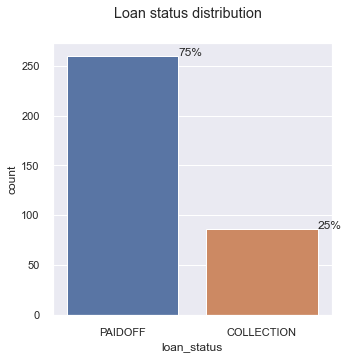

In [196]:
sns.set(style='darkgrid')
plt.figure(figsize=(5,5))

ax=sns.countplot(x='loan_status',data=df)

total = float(len(df))

for p in ax.patches:
    percentage='{:.0f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y))

plt.suptitle('Loan status distribution')

plt.show()

We can see that 1/4 people represents the "not paid" (collection mode) category

<AxesSubplot:xlabel='loan_status'>

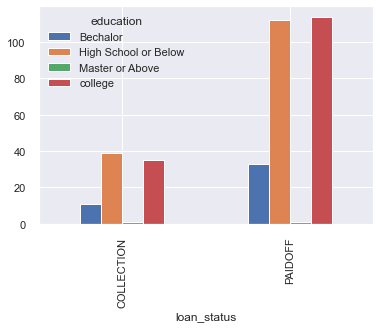

In [197]:
df1=df.groupby(['loan_status','education']).size()
df1=df1.unstack()

df1.plot(kind='bar')

In [198]:
#calculus of pay % for each education level

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

We can say that the education levels are not properly and linearly correlated to loan status / payments reliability, but:
- people with master or above are not very good client
- 3/4 people, with an education level below master, pay the loan

In [199]:
#calculus of pay % for each education level

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [200]:
#calculus of pay % for each age 

df.groupby(['age'])['loan_status'].value_counts(normalize=True)

age  loan_status
18   COLLECTION     1.000000
19   PAIDOFF        1.000000
20   PAIDOFF        1.000000
21   PAIDOFF        0.800000
     COLLECTION     0.200000
22   PAIDOFF        0.714286
     COLLECTION     0.285714
23   PAIDOFF        0.750000
     COLLECTION     0.250000
24   PAIDOFF        0.714286
     COLLECTION     0.285714
25   PAIDOFF        0.625000
     COLLECTION     0.375000
26   PAIDOFF        0.689655
     COLLECTION     0.310345
27   PAIDOFF        0.760000
     COLLECTION     0.240000
28   PAIDOFF        0.750000
     COLLECTION     0.250000
29   PAIDOFF        0.777778
     COLLECTION     0.222222
30   PAIDOFF        0.740741
     COLLECTION     0.259259
31   PAIDOFF        0.842105
     COLLECTION     0.157895
32   PAIDOFF        0.642857
     COLLECTION     0.357143
33   PAIDOFF        0.823529
     COLLECTION     0.176471
34   PAIDOFF        0.800000
     COLLECTION     0.200000
35   PAIDOFF        0.800000
     COLLECTION     0.200000
36   PAIDOFF        0.8888

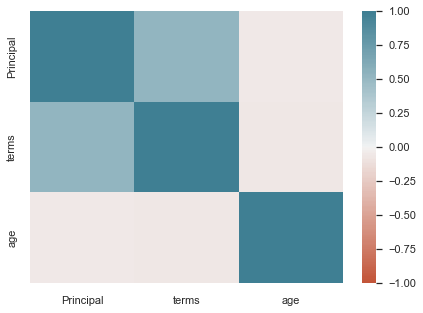

In [201]:
fig,ax = plt.subplots(figsize=(7, 5))
corr=df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

<AxesSubplot:xlabel='loan_status'>

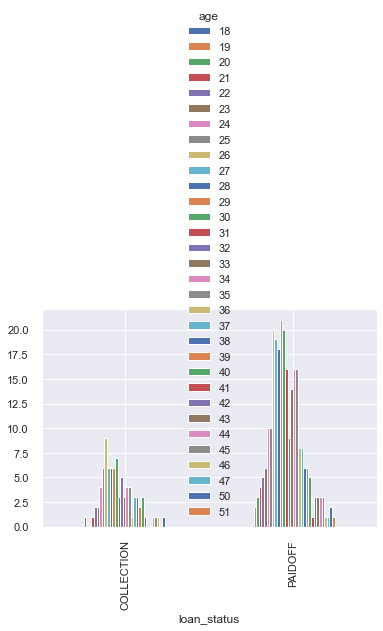

In [202]:
df1=df.groupby(['loan_status','age']).size()
df1=df1.unstack()

df1.plot(kind='bar')

We should use kmeans for better analyzing correlation between age and payment status

<AxesSubplot:xlabel='loan_status'>

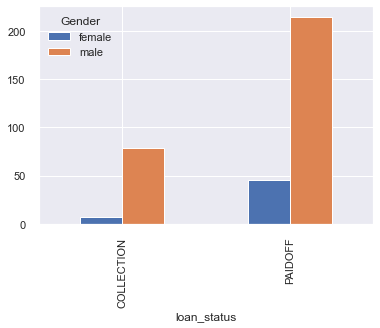

In [203]:
df1=df.groupby(['loan_status','Gender']).size()
df1=df1.unstack()

df1.plot(kind='bar')

This is a curious distribution. Let's calculate the % numbers:

In [204]:
#calculus of pay % for each gender

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

We can see that
- 86 % of female pay loans
- 73 % of males pay loans

Female customers are slight better rather than male customers

# Pre-processing:  Feature selection/extraction


## Convert Categorical features to numerical values


Let's convert male to 0 and female to 1:


In [205]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


## One Hot Encoding ---> convert categorical-not-boolean data to numerical-boolean data


In [206]:
Feature=df[['Principal','terms','age','Gender']]

Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)

Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


### Feature Selection


Let's define feature sets, X:


In [207]:
x=Feature
x

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,0,1,0,0
342,1000,30,25,0,0,1,0,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


Let's define feature sets' labels


In [208]:
y=df['loan_status'].values
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

## Normalization


Data Standardization give data zero mean and unit variance


In [209]:
x=preprocessing.StandardScaler().fit(x).transform(x)
x

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [210]:
df['loan_status'].replace(['PAIDOFF','COLLECTION'],['1','0'],inplace=True)

In [211]:
df['loan_status'].apply(int).inplace=True

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 21.8+ KB


In [213]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,1,1000,15,2016-09-08,2016-09-22,27,college,0
3,1,1000,30,2016-09-09,2016-10-08,28,college,1
4,1,1000,30,2016-09-09,2016-10-08,29,college,0
...,...,...,...,...,...,...,...,...
341,0,800,15,2016-09-11,2016-09-25,32,High School or Below,0
342,0,1000,30,2016-09-11,2016-10-10,25,High School or Below,0
343,0,800,15,2016-09-12,2016-09-26,39,college,0
344,0,1000,30,2016-09-12,2016-11-10,28,college,0


In [214]:
df1=pd.concat([df,pd.get_dummies(df['education'])], axis=1)


In [215]:
df1.drop(['education'],axis=1,inplace=True)
df1

,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1,1000,30,2016-09-08,2016-10-07,45,0,0,1,0,0
1,1,1000,30,2016-09-08,2016-10-07,33,1,1,0,0,0
2,1,1000,15,2016-09-08,2016-09-22,27,0,0,0,0,1
3,1,1000,30,2016-09-09,2016-10-08,28,1,0,0,0,1
4,1,1000,30,2016-09-09,2016-10-08,29,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
341,0,800,15,2016-09-11,2016-09-25,32,0,0,1,0,0
342,0,1000,30,2016-09-11,2016-10-10,25,0,0,1,0,0
343,0,800,15,2016-09-12,2016-09-26,39,0,0,0,0,1
344,0,1000,30,2016-09-12,2016-11-10,28,0,0,0,0,1


/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


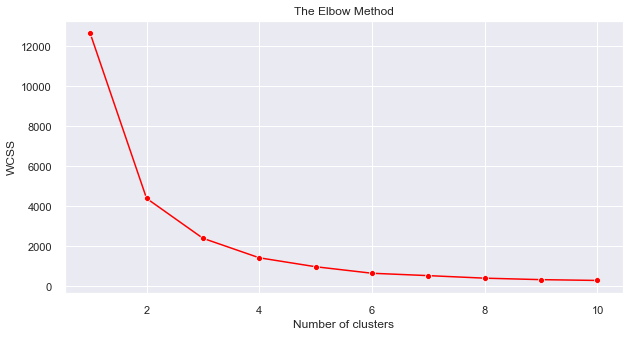

In [216]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer

RK=df1.iloc[:, [0,5]].values
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(RK)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

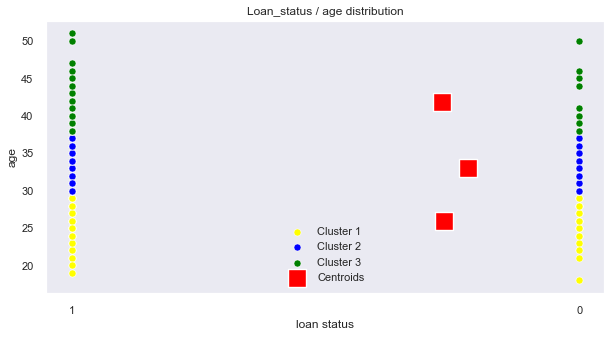

In [217]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(RK)


#Visualising the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(RK[y_kmeans == 0, 0], RK[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(RK[y_kmeans == 1, 0], RK[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(RK[y_kmeans == 2, 0], RK[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Loan_status / age distribution')
plt.xlabel('loan status')
plt.ylabel('age')
plt.legend()
plt.show()

By using k-means algorithm we can say that there isn't a correlation between loan status and age. The distribution is very simiral

# Classification


Algorithms

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)

In [232]:
x

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [235]:
#reload of the dataset due to kmeans transformation
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

df0=pd.read_csv(url)

y=df0['loan_status'].values
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

In [236]:
#split of xtrain,xtest,ytrain,ytest --> in thid order
xTraining,xTesting,yTraining,yTesting=train_test_split(x,y,test_size=0.3,random_state=4)

In [237]:
for k in range(1,10):
    knnModel=KNeighborsClassifier(n_neighbors=k).fit(xTraining,yTraining)
    yPrediction=knnModel.predict(xTesting)
    
    print("K={} ---> accuracy score --> {}".format(k,round(accuracy_score(yTesting,yPrediction),3)))

# the best K is the highest

K=1 ---> accuracy score --> 0.615
K=2 ---> accuracy score --> 0.519
K=3 ---> accuracy score --> 0.692
K=4 ---> accuracy score --> 0.635
K=5 ---> accuracy score --> 0.692
K=6 ---> accuracy score --> 0.673
K=7 ---> accuracy score --> 0.721
K=8 ---> accuracy score --> 0.721
K=9 ---> accuracy score --> 0.702


In [238]:
#best K=7

k=7

# KNN model fitting
knnModel=KNeighborsClassifier(n_neighbors=k).fit(xTraining,yTraining)
knnModel

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [239]:
decTreeModel=DecisionTreeClassifier(criterion="entropy",max_depth=3)
decTreeModel.fit(xTraining,yTraining)
decTreeModel

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [240]:
yPrediction=decTreeModel.predict(xTesting)
yPrediction

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

# Support Vector Machine


In [241]:
svmModel=svm.SVC()
svmModel.fit(xTraining,yTraining)

SVC()

In [242]:
yPrediction=svmModel.predict(xTesting)
yPrediction

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

# Logistic Regression


In [243]:
logRegrModel=LogisticRegression(C=0.01).fit(xTraining,yTraining)
logRegrModel

LogisticRegression(C=0.01)

In [244]:
yPrediction=logRegrModel.predict(xTesting)
yPrediction

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

# Model Evaluation using Test set

### Load Test set for evaluation

In [245]:
test_url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

test_df=pd.read_csv(test_url)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [246]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      54 non-null     int64 
 1   Unnamed: 0.1    54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


### Preprocessing

In [247]:
test_df['due_date']=pd.to_datetime(test_df['due_date'])
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])

test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

test_df_Preprocessed=test_df[['Principal','terms','age','Gender']]

test_df_Preprocessed=pd.concat([test_df_Preprocessed,pd.get_dummies(test_df['education'])],axis=1)

### TEST SET CREATION

In [248]:
# NORMALIZATION ----- independent variables definition

x_testing=preprocessing.StandardScaler().fit(test_df_Preprocessed).transform(test_df_Preprocessed)

# TARGET VARIABLE Y definition
y_testing=test_df['loan_status']

In [249]:
#KNN

knnPrediction=knnModel.predict(x_testing)

print("KNN Jaccard index: %.2f" % jaccard_score(y_testing,knnPrediction,pos_label='PAIDOFF'))
print("KNN F1-score: %.2f" % f1_score(y_testing,knnPrediction,average='weighted'))

###----------------------------------------------------------------------------###

#Decision Tree

dtPrediction=decTreeModel.predict(x_testing)

print("Decision Tree Jaccard index: %.2f" % jaccard_score(y_testing,dtPrediction,pos_label='PAIDOFF'))
print("Decision Tree F1-score: %.2f" % f1_score(y_testing,dtPrediction,average='weighted'))

###----------------------------------------------------------------------------###

#Support Vector Machine SVM

svmPrediction=svmModel.predict(x_testing)

print("SVM Jaccard index: %.2f" % jaccard_score(y_testing,svmPrediction,pos_label='PAIDOFF'))
print("SVM F1-score: %.2f" % f1_score(y_testing,svmPrediction, average='weighted'))

###----------------------------------------------------------------------------###

#Logistic Regression

logRegrPrediction=logRegrModel.predict(x_testing)
logRegrPrediction_likelihood=logRegrModel.predict_proba(x_testing)

print("Logistic Regression Jaccard index: %.2f" % jaccard_score(y_testing,logRegrPrediction,pos_label='PAIDOFF'))
print("Logistic Regression F1-score: %.2f" % f1_score(y_testing,logRegrPrediction, average='weighted'))
print("Logistic Regression LogLoss: %.2f" % log_loss(y_testing,logRegrPrediction_likelihood))

###----------------------------------------------------------------------------###

KNN Jaccard index: 0.74
KNN F1-score: 0.63
Decision Tree Jaccard index: 0.74
Decision Tree F1-score: 0.63
SVM Jaccard index: 0.74
SVM F1-score: 0.63
Logistic Regression Jaccard index: 0.74
Logistic Regression F1-score: 0.63
Logistic Regression LogLoss: 0.57


JACCARD index ---> is a similarity coefficient ---> represents the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels ---->> best near 1

F1 SCORE ---> represents the precision ---->> best near 1

LOG LOSS ---> PROBABILITY PREDICTION ---> provides a measure of how certain classifier's predictions are ---->> best near 1

# Report

Here there is the table about the accuracy of the built model using different evaluation metrics:   ----> all the 3 algorithms produced the same accuracy


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.74    | 0.63     | NA      |
| Decision Tree      | 0.74    | 0.63     | NA      |
| SVM                | 0.74    | 0.63     | NA      |
| LogisticRegression | 0.74    | 0.63     | 0.57    |
